# Notes, assumptions and premises:

Activities can be classified as "content generation" activities versus "content distribution/handling". For example, tweeting, replying, direct messaging are "content generation" type activities. Whereas, retweeting, sharing via dm, favoriting are "content distribution/handling" type activities.

Presumably the process that generates content, say process A, and the process that distributes/handles pre-generated content, say process B, is different. The process A is a creative process in which content is being created or information is being communicated to someone else. In process B, content is not created but already generated content is retweeted, shared or favorited for future consumption. I believe it is a worthwhile effort to understand the difference between these two processes, what features affect these processes and which users are good at which processes. For the purpose of this data science challenge I would like try to find some indicators about how these processes differ from the given data.

Process A i.e. 'tweeting' can further be classified into replying or creating a new tweet to a user or set of users. A tweet by default is to all followers. Users can be segmented between those who tweet to the general follower populace or those who tweet only to a particular set of users, or those who only tweet replies. However, all these segments of users "generate" new content. This is important because, generating new content can be thought of as a deeper level of engagement than reusing content already present on the website.

Process B can further be separated into individual processes for retweeting, sharing and favoriting. I will not dvelve further into this but I can clearly see potential differences in the processes relative to network effects, communities, reciprocal behavior, clustering etc. For example, when a user retweets another tweet it is primarily because they "agree" with the content of the tweet and want others to take notice. Whereas when a user favorites a tweet it is presumably for their own delayed consumption. Activities of retweeting, sharing and favoriting are treated as one here, that of content distribution rather than content creation.

Furthermore processes A and B maybe further different for each and every individual user (mostly are). Therefore it is important to segment the users by processes A and B.


'Time in app' and 'Number of timeline views' is an excellent indicator of 'how addicted' a user. Both these metrics 

##Exploratory data analysis

###User graph data 

In [16]:
import pandas
graph = pandas.read_csv('data/user_graph.csv')

# remove nan
graph.dropna()

# print dtypes
graph.dtypes

user_id                            int64
followers                        float64
followings                       float64
active_followers                 float64
num_mutual_follower_added_30d      int64
dtype: object

In [17]:
graph.describe()

,user_id,followers,followings,active_followers,num_mutual_follower_added_30d
count,4000000.000000,3928007.000000,3967588.000000,3928007.000000,4000000.000000
mean,2000000.500000,424.013031,273.838268,279.464293,9.154459
std,1154700.682717,34250.332521,1254.983664,13424.065390,102.175053
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1000000.750000,18.000000,52.000000,13.000000,0.000000
50%,2000000.500000,81.000000,141.000000,63.000000,1.000000
75%,3000000.250000,233.000000,297.000000,182.000000,5.000000
max,4000000.000000,51580785.000000,937499.000000,18812685.000000,41780.000000


###Distributions

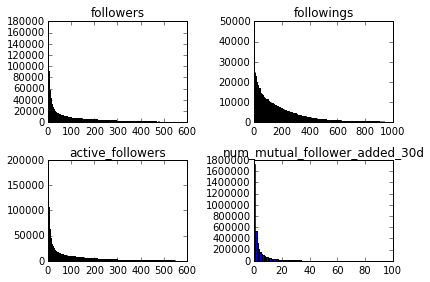

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2, 2)
axarr[0, 0].hist(graph['followers'], range(600))
axarr[0, 0].set_title('followers')
axarr[0, 1].hist(graph['followings'], range(1000))
axarr[0, 1].set_title('followings')
axarr[1, 0].hist(graph['active_followers'], range(600))
axarr[1, 0].set_title('active_followers')
axarr[1, 1].hist(graph['num_mutual_follower_added_30d'], range(100))
axarr[1, 1].set_title('num_mutual_follower_added_30d')
f.tight_layout()

###Engagement data

##Hypothesis

'Retweeting', 'sharing', 'favoriting' activities is a function of number of followings, number of followers, time spent in app, timeline views.

The reasoning behind this is; the more people a user follows, the more likely it is for the user to have available content to be retweeted or favorited from. The more time spend in app and timeline views increase the probability of this happening. 